In [3]:


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Implementação algorítmica

In [169]:

def minimos_quadrados(x: np.array, y: np.array) -> tuple[float, float]:

    n = y.shape[0]
    sum_of_x = np.sum(x)
    sum_of_y = np.sum(y)
    sum_of_x_times_y = np.sum(x * y)
    sum_of_x_squared = np.sum(np.power(x, 2))

    # Coeficiente angular (b)
    b = (n * sum_of_x_times_y - sum_of_x * sum_of_y) / (n * sum_of_x_squared - sum_of_x**2)

    # Intercepto (a)
    a = (sum_of_y - b * sum_of_x) / n
    
    return a, b


# Exercício 06

<Axes: title={'center': 'Exercicio 6'}>

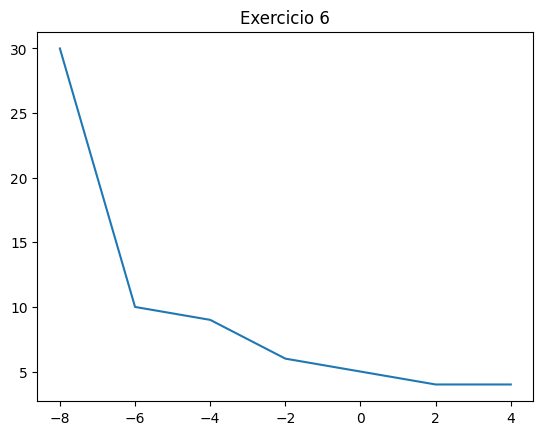

In [7]:

x = np.array([-8, -6, -4, -2, 0, 2, 4])
y = np.array([30, 10, 9, 6, 5, 4, 4])

plt.title('Exercicio 6')
sns.lineplot(x=x, y=y)


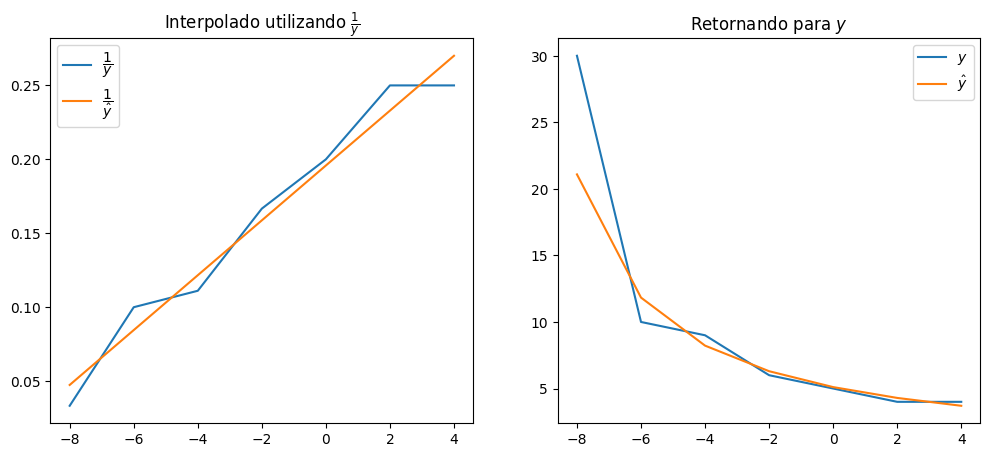

In [103]:

g = lambda x: 1 / x

a, b = minimos_quadrados(x, g(y))
y_hat = a + b * x

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title(r'Interpolado utilizando $\frac{1}{y}$')
sns.lineplot(ax=axes[0], x=x, y=g(y), label=r'$\dfrac{1}{y}$')
sns.lineplot(ax=axes[0], x=x, y=y_hat, label=r'$\dfrac{1}{\hat{y}}$')

axes[1].set_title(r'Retornando para $y$')
sns.lineplot(ax=axes[1], x=x, y=g(g(y)), label=r'$y$')
sns.lineplot(ax=axes[1], x=x, y=g(y_hat), label=r'$\hat{y}$')

resultado01 = g(y_hat)


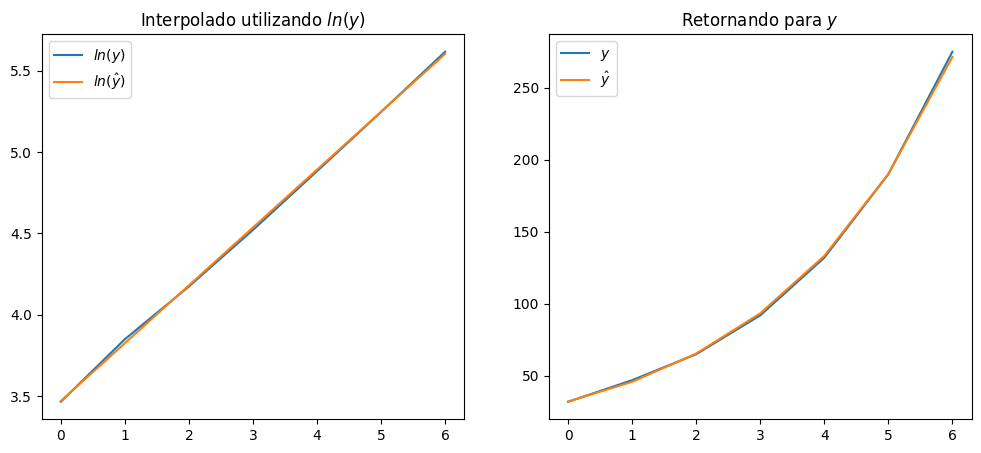

In [118]:

g = lambda x: np.log(x)

a, b = minimos_quadrados(x, g(y))
y_hat = a + b * x

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title(r'Interpolado utilizando $ln(y)$')
sns.lineplot(ax=axes[0], x=x, y=g(y), label=r'$ln(y)$')
sns.lineplot(ax=axes[0], x=x, y=y_hat, label=r'$ln(\hat{y})$')

axes[1].set_title(r'Retornando para $y$')
sns.lineplot(ax=axes[1], x=x, y=np.exp(g(y)), label=r'$y$')
sns.lineplot(ax=axes[1], x=x, y=np.exp(y_hat), label=r'$\hat{y}$')

resultado02 = np.exp(y_hat)


In [119]:

SE01 = (resultado01 - y)**2
SE02 = (resultado02 - y)**2

print(f'MSE 01: {round(np.mean(SE01), 4)} ({round(np.std(SE01), 4)})')
print(f'MSE 02: {round(np.mean(SE02), 4)} ({round(np.std(SE02), 4)})')
print('Valores entre parênteses são desvio padrão')


MSE 01: 19445.033 (24741.5118)
MSE 02: 2.5917 (4.3023)
Valores entre parênteses são desvio padrão


# Exercício 7

<Axes: title={'center': 'Exercicio 7'}>

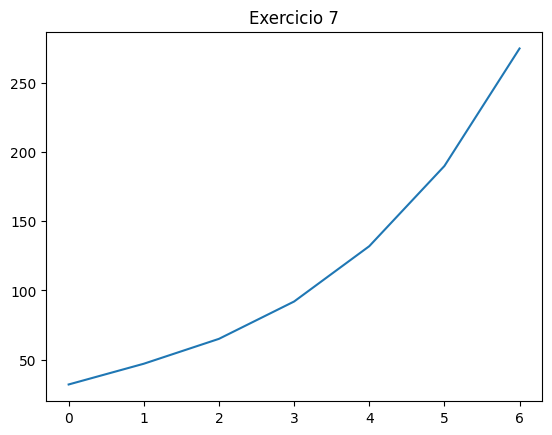

In [133]:

x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([32, 47, 65, 92, 132, 190, 275])

plt.title('Exercicio 7')
sns.lineplot(x=x, y=y)


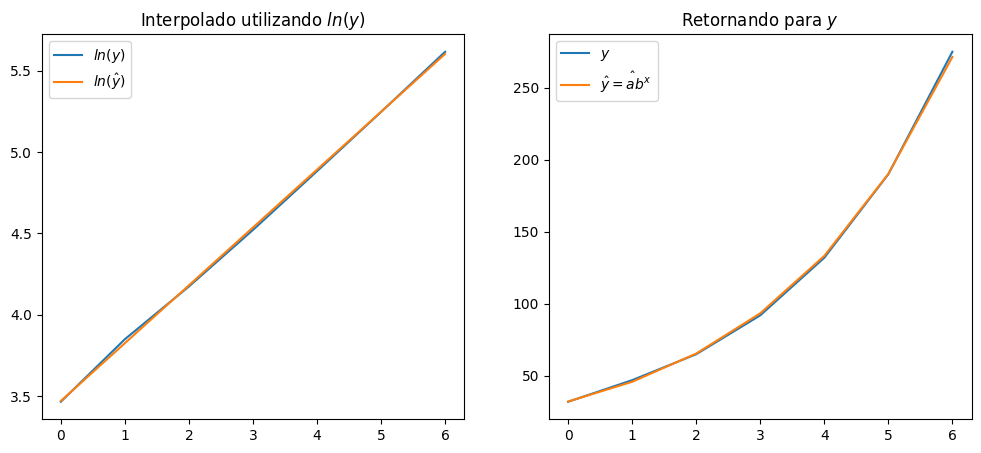

In [175]:

a, b = minimos_quadrados(x, np.log(y))

f_01 = lambda x: np.exp(a + b * x)
y_hat = f_01(x)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title(r'Interpolado utilizando $ln(y)$')
sns.lineplot(ax=axes[0], x=x, y=np.log(y), label=r'$ln(y)$')
sns.lineplot(ax=axes[0], x=x, y=np.log(y_hat), label=r'$ln(\hat{y})$')

axes[1].set_title(r'Retornando para $y$')
sns.lineplot(ax=axes[1], x=x, y=y, label=r'$y$')
sns.lineplot(ax=axes[1], x=x, y=y_hat, label=r'$\hat{\hat{y} = ab^x}$')

resultado02 = y_hat


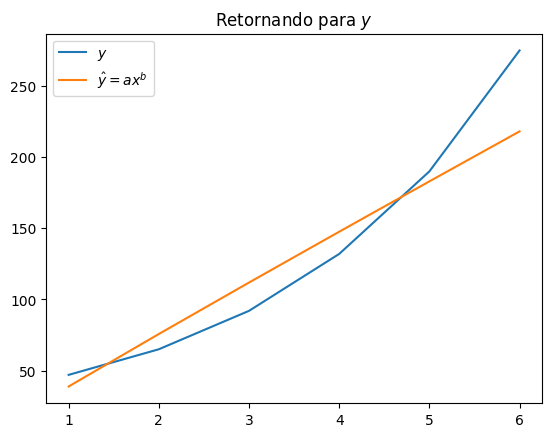

In [176]:

X_positivo = x[x > 0]
Y_positivo = y[x > 0]

a, b = minimos_quadrados(np.log(X_positivo), np.log(Y_positivo))

f_02 = lambda x: np.exp(a) * x ** b
y_hat = f_02(X_positivo)

plt.title(r'Retornando para $y$')
sns.lineplot(x=X_positivo, y=Y_positivo, label=r'$y$')
sns.lineplot(x=X_positivo, y=y_hat, label=r'$\hat{y} = ax^b$')

resultado02 = y_hat


In [184]:

print(f'y = ax^b {f_01(np.array(range(7, 10)))}')
print(f'y = ab^x {f_02(np.array(range(7, 10)))}')


y = ax^b [ 32894.22896894  86175.67566424 225761.39672402]
y = ab^x [253.02934424 287.75468025 322.31974872]



Assim, é evidente que a segunda estimativa não captura o comportamento exponencial da função.

Por isso, a primeira abordagem ($y = ax^b$) deve ser considerada.
